# Wine 데이터로 군집화하고 실루엣 분석하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

- 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
wine_df = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
wine_df['target'] = wine.target
wine_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


- 군집화

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
wine_df['cluster'] = kmeans.labels_
wine_df.tail()

,PC1,PC2,target,cluster
173,-3.370524,-2.216289,2,2
174,-2.601956,-1.757229,2,2
175,-2.677839,-2.760899,2,2
176,-2.387017,-2.297347,2,2
177,-3.208758,-2.768920,2,2


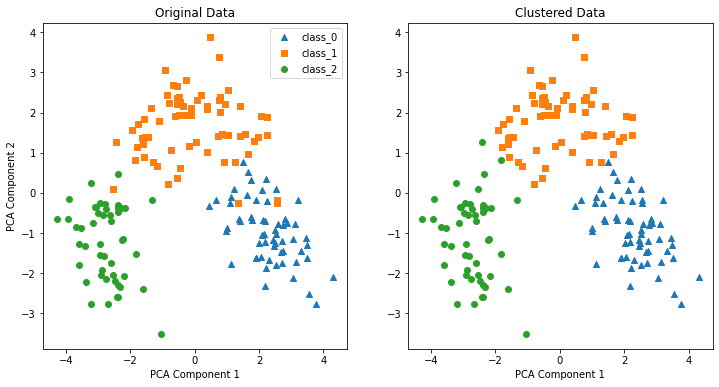

In [9]:
markers = ['^', 's', 'o']
fig, axs = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wine_df[wine_df[column] == i]['PC1']
        y_axis_data = wine_df[wine_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])

    if k==0:        #target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:           #cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

- 실루엣 분석

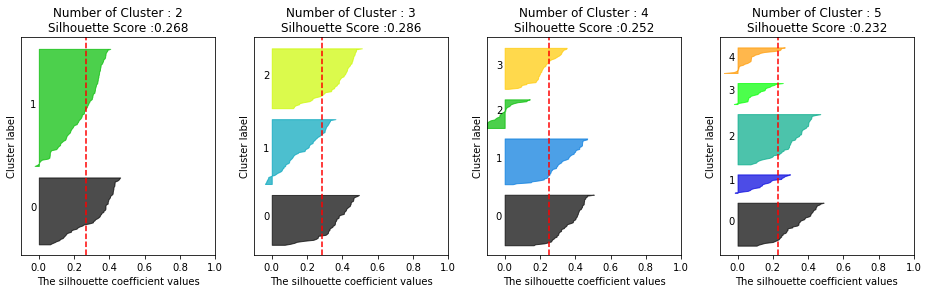

In [10]:
from visualize import visualize_silhouette

visualize_silhouette([2,3,4,5], wine_std)